# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_pickle(training_file)
print(train_data.keys())
train_data['features'].shape

dict_keys(['coords', 'labels', 'features', 'sizes'])


(34799, 32, 32, 3)

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
train_data = pd.read_pickle(training_file)
n_train = train_data['labels'].shape[0]

# TODO: Number of validation examples
validation_data = pd.read_pickle(validation_file)
n_validation = validation_data['labels'].shape[0]

# TODO: Number of testing examples.
test_data = pd.read_pickle(testing_file)
n_test = test_data['labels'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train_data['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train_data['labels']).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

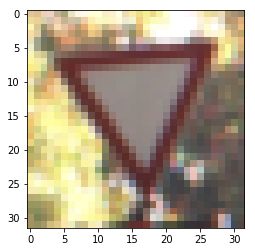

In [5]:
plt.imshow(train_data['features'][22222])

In [6]:
num_signs = np.unique(train_data['labels'])
print('number of different signs:', len(num_signs))

number of different signs: 43


In [7]:
labels_df = pd.DataFrame(train_data['labels'])
labels_df = pd.DataFrame(labels_df[0].value_counts()).sort_index().reset_index().rename(columns={'index':'sign number', 0:'count'})

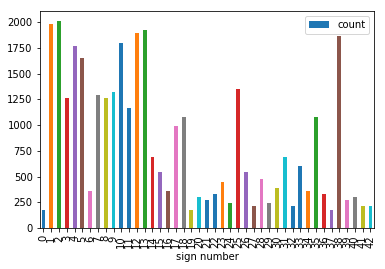

In [8]:
labels_df.plot.bar(x='sign number', y='count')
# shows that not the number of sign data is evenly distributed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### gray and normalized image

In [10]:
gry_X_train = X_train.mean(axis=3, keepdims=True)
gry_X_valid = X_valid.mean(axis=3, keepdims=True)
gry_X_test = X_test.mean(axis=3, keepdims=True)


In [11]:
normalized_X_train = (gry_X_train - 128.0) / 128
normalized_X_valid = (gry_X_valid - 128.0) / 128
normalized_X_test = (gry_X_test - 128.0) / 128

In [12]:
normalized_X_train[222].shape

(32, 32, 1)

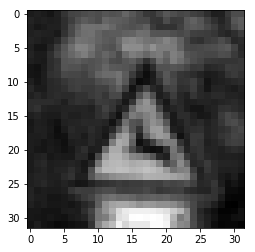

In [13]:
plt.imshow(normalized_X_train[222].squeeze(), cmap='gray')

#### add more image data by augmenting them

In [14]:
import random
import cv2
import time

In [15]:
def random_translate(img):
    rnd_x, rnd_y = np.random.randint(-2,2,2)
    
    row, col = img.shape[0], img.shape[1]
    
    M = np.float32([[1,0,rnd_x], [0,1,rnd_y]])
    dst = cv2.warpAffine(img, M, (col,row))
    dst = dst[:,:,np.newaxis]
    return dst

In [16]:
test = normalized_X_train[222]

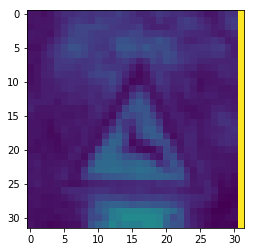

In [17]:
plt.imshow(random_translate(test).squeeze())

In [18]:
def random_rotation(img):
    rnd_theta = np.random.randint(-15,15,1)
    
    row, col = img.shape[0], img.shape[1]
    plt.imshow(img.squeeze())
    M = cv2.getRotationMatrix2D((col/2,row/2), rnd_theta, 1)
    dst = cv2.warpAffine(img, M, (col, row))
    return dst

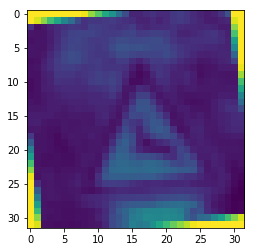

In [19]:
plt.imshow(random_rotation(test).squeeze())

In [20]:
test = []

len(test) == 0

True

In [21]:
# need to append back to X_data and y_data
# creates largest_5_mean*0.6 - len(data of sign number)
def augment_images(images_dict, largest_5_mean):
    
    goal = np.floor(largest_5_mean * 0.6)
    augmented_dict = {}
    for i in images_dict:
        augmented_images = []
        
        for _ in range((goal - len(images_dict[i])).astype(int) ):
            if len(images_dict[i]) == 0:
                break
            
            img = random.choice(images_dict[i][:-1])
            
            augmented_img = random_rotation(img)
            augmented_img = random_translate(augmented_img)
            
            augmented_images.append(augmented_img)

        augmented_dict[i] = augmented_images

    return augmented_dict

In [22]:
train_df = pd.DataFrame(pd.DataFrame(y_train)[0].value_counts()).sort_index().reset_index().rename(columns={'index':'sign number', 0:'count'})
train_largest_5 = train_df['count'].nlargest(5)
train_largest_5_mean = np.floor(train_largest_5.mean())

valid_df = pd.DataFrame(pd.DataFrame(y_valid)[0].value_counts()).sort_index().reset_index().rename(columns={'index':'sign number', 0:'count'})
valid_largest_5 = valid_df['count'].nlargest(5)
valid_largest_5_mean = np.floor(valid_largest_5.mean())

test_df = pd.DataFrame(pd.DataFrame(y_test)[0].value_counts()).sort_index().reset_index().rename(columns={'index':'sign number', 0:'count'})
test_largest_5 = test_df['count'].nlargest(5)
test_largest_5_mean = np.floor(test_largest_5.mean())


In [23]:
train_less_than_largestMean_dict = {}
for i in np.unique(y_train):
    train_less_than_largestMean_dict[i] = []

valid_less_than_largestMean_dict = {}
for i in np.unique(y_valid):
    valid_less_than_largestMean_dict[i] = []
    
test_less_than_largestMean_dict = {}
for i in np.unique(y_test):
    test_less_than_largestMean_dict[i] = []
    


In [24]:

for sign_number, count in zip(train_df[train_df['count'] < (train_largest_5_mean * 0.6)]['sign number'], train_df[train_df['count'] < (train_largest_5_mean * 0.6)]['count']):
#     print(sign_number, count)
    for x, y in zip(normalized_X_train, y_train):
        if y == sign_number:
            train_less_than_largestMean_dict[sign_number].append(x)
    
    train_less_than_largestMean_dict[sign_number].append(count)
            

for sign_number, count in zip(valid_df[valid_df['count'] < (valid_largest_5_mean * 0.6)]['sign number'], valid_df[valid_df['count'] < (valid_largest_5_mean * 0.6)]['count']):
#     print(sign_number, count)
    for x, y in zip(normalized_X_valid, y_valid):
        if y == sign_number:
            valid_less_than_largestMean_dict[sign_number].append(x)
            
    valid_less_than_largestMean_dict[sign_number].append(count)
            
for sign_number, count in zip(test_df[test_df['count'] < (test_largest_5_mean * 0.6)]['sign number'], test_df[test_df['count'] < (test_largest_5_mean * 0.6)]['count']):
#     print(sign_number, count)
    for x, y in zip(normalized_X_test, y_test):
        if y == sign_number:
            test_less_than_largestMean_dict[sign_number].append(x) 
            
    test_less_than_largestMean_dict[sign_number].append(count)
          

In [25]:
# train_augmented_images_dict = augment_images(train_less_than_largestMean_dict, train_largest_5_mean)

In [26]:
# valid_augmented_images_dict = augment_images(valid_less_than_largestMean_dict, valid_largest_5_mean)

In [27]:
# test_augmented_images_dict = augment_images(test_less_than_largestMean_dict, test_largest_5_mean)

In [29]:
# # combine the old and augmented image datasets in a new dictionary

# appended_X_train = normalized_X_train
# appended_y_train = y_train
# for sign_number in range(n_classes):
#     print(f"Starting {sign_number} merge...")
#     if (train_augmented_images_dict[sign_number]) == 0:
#         print(f"{sign_number} skipped")
#         pass
#     else:
#         count=0
#         for img in np.asarray(train_augmented_images_dict[sign_number]):
#             appended_X_train = np.append(appended_X_train, np.expand_dims(img, axis=0), axis=0)
#             appended_y_train = np.append(appended_y_train, sign_number)
#             count += 1
#             if count % 200 == 0:
#                 print(f"on image {count} from sign number : {sign_number}")
#                 print(f"have left {len(train_augmented_images_dict[sign_number]) - count} images to go...")
#                 print(f"{count/len(train_augmented_images_dict[sign_number])}% completed...")
#     print(f"Finished {sign_number}...")
    
# # save the appended data cause it takes long
# with open('../data/X_train.pickle', 'wb') as f:
#     pickle.dump(appended_X_train, f)
# with open('../data/y_train.pickle', 'wb') as f:
#     pickle.dump(appended_y_train, f)

In [30]:
# found to be useless
with open('../data/X_train.pickle', 'rb') as f:
    appended_X_train = pickle.load(f)
with open('../data/y_train.pickle', 'rb') as f:
    appended_y_train = pickle.load(f)

In [31]:
# print(np.asarray(train_augmented_images_dict[0]).shape)
print(normalized_X_train.shape)

(34799, 32, 32, 1)


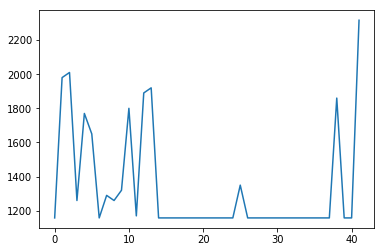

In [32]:
plt.plot(np.histogram(appended_y_train,bins=42)[0])

### Model Architecture

In [33]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [34]:
import tensorflow as tf

def model(input):
    mu = 0
    sigma = 0.1
    
    # layer 1 convolution : 32x32x1 -> 28x28x16
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,16), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(input, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b
    
    # activation function
    conv1 = tf.nn.relu(conv1)
    
    # max pool 1 : 28x28x16 -> 14x14x16
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # dropout 1
#     conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    
    
    # layer 2 convolution : 14x14x16 -> 10x10x64
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,16,64), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # activation function
    conv2 = tf.nn.relu(conv2)
    
    # max pool 2 : 10x10x64 -> 5x5x64
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # dropout 2 
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    
    # layer 3 convolution : 5x5x64 -> 3x3x128
    conv3_w = tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides=[1,1,1,1], padding='VALID') + conv3_b
    
    # activation
    conv3 = tf.nn.relu(conv3)
    
    # dropout3
#     conv3 = tf.nn.dropout(conv3, keep_prob=keep_prob)
    
#     conv4_w = tf.Variable(tf.truncated_normal(shape=(1,1,128,256), mean=mu, stddev=sigma))
#     conv4_b = tf.Variable(tf.zeros(256))
#     conv4 = tf.nn.conv2d(conv3, conv4_w, strides=[1,1,1,1], padding='VALID') + conv4_b
    
#     # activation
#     conv4 = tf.nn.relu(conv4)
    
    # dropout3
#     conv4 = tf.nn.dropout(conv4, keep_prob=keep_prob)
    
    # layer 4 linear : 3x3x256 -> 2304
    flt0 = tf.contrib.layers.flatten(conv3)
    
    # 1152 -> 500 
    linear1_w = tf.Variable(tf.truncated_normal(shape=(1152, 500), mean=mu, stddev=sigma))
    linear1_b = tf.Variable(tf.zeros(500))
    linear1 = tf.add(tf.matmul(flt0, linear1_w), linear1_b)
    
    # activation function
    linear1 = tf.nn.relu(linear1)
    linear1 = tf.nn.dropout(linear1, keep_prob=keep_prob)
    
    # layer 5 linear : 500 -> 100
    linear2_w = tf.Variable(tf.truncated_normal(shape=(500, 100), mean=mu, stddev=sigma))
    linear2_b = tf.Variable(tf.zeros(100))
    linear2 = tf.add(tf.matmul(linear1, linear2_w), linear2_b)
    
    # activation func
    linear2 = tf.nn.relu(linear2)
    linear2 = tf.nn.dropout(linear2, keep_prob=keep_prob)
    
    # layer 6 linear : 100 -> 43
    linear3_w = tf.Variable(tf.truncated_normal(shape=(100,43), mean=mu, stddev=sigma))
    linear3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(linear2, linear3_w), linear3_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [35]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [36]:
batch_size = 128
n_epoch = 150
learning_rate = 0.0001

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

In [37]:
y_pred = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=y_pred)
loss_function = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_operation = optimizer.minimize(loss_function)

In [38]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(one_hot_y, 1))
accuracy_prediction = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [39]:
def evaluate(X_train, y_train):
    n_example = len(y_train)
    total_accuracy = 0
    sess = tf.get_default_session()
    for i in range(0, n_example, batch_size):
        batch_x = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        accuracy = sess.run(accuracy_prediction, feed_dict={x:batch_x, y:batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / n_example

In [40]:
from sklearn.utils import shuffle

X_train, y_train= shuffle(normalized_X_train, y_train)
X_valid, y_valid = shuffle(normalized_X_valid, y_valid)       

# The same file as we saved earlier
model_checkpoint = 'model.chkpt'
# Create a saver so we can save and load the model as we train it
tf_saver = tf.train.Saver()


In [41]:

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    print('Training...')
    for epoch in range(n_epoch):
        count=0
        batch_x=0
        batch_y=0
        
        print(f"EPOCH {epoch}...")
        
        for i in range(0, n_train, batch_size):
            batch_x = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            
            _, loss = sess.run([train_operation, loss_function], feed_dict={x:batch_x, y:batch_y, keep_prob:0.3})
            
            count += 1
            if count%100==0:
                print(f'Loss at batch {i}: {loss}')
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        
        print(f"Training Accuracy = {train_accuracy}")
        print(f"Validation Accuracy = {validation_accuracy}")
    
    tf_saver.save(sess, model_checkpoint)

Training...
EPOCH 0...
Loss at batch 12672: 4.149603843688965
Loss at batch 25472: 3.93259334564209
Training Accuracy = 0.060145406493255366
Validation Accuracy = 0.05578231292348059
EPOCH 1...
Loss at batch 12672: 3.759368896484375
Loss at batch 25472: 3.727059841156006
Training Accuracy = 0.08000229891834836
Validation Accuracy = 0.06009070294615633
EPOCH 2...
Loss at batch 12672: 3.6469829082489014
Loss at batch 25472: 3.6954891681671143
Training Accuracy = 0.08586453637322042
Validation Accuracy = 0.06303854872580288
EPOCH 3...
Loss at batch 12672: 3.6540029048919678
Loss at batch 25472: 3.6708221435546875
Training Accuracy = 0.07414006150158668
Validation Accuracy = 0.0723356008799979
EPOCH 4...
Loss at batch 12672: 3.6375911235809326
Loss at batch 25472: 3.5868442058563232
Training Accuracy = 0.07250208341204205
Validation Accuracy = 0.07414965983691399
EPOCH 5...
Loss at batch 12672: 3.6329283714294434
Loss at batch 25472: 3.504438638687134
Training Accuracy = 0.0835081467913938

Loss at batch 12672: 0.5798162221908569
Loss at batch 25472: 0.7456992864608765
Training Accuracy = 0.929394522968142
Validation Accuracy = 0.9052154192848811
EPOCH 49...
Loss at batch 12672: 0.6141818165779114
Loss at batch 25472: 0.6893516778945923
Training Accuracy = 0.9327566885476126
Validation Accuracy = 0.9006802718925908
EPOCH 50...
Loss at batch 12672: 0.7104663848876953
Loss at batch 25472: 0.5468465089797974
Training Accuracy = 0.9325842697999475
Validation Accuracy = 0.9108843535252439
EPOCH 51...
Loss at batch 12672: 0.5615689158439636
Loss at batch 25472: 0.6819005012512207
Training Accuracy = 0.9358889624464015
Validation Accuracy = 0.9052154195551969
EPOCH 52...
Loss at batch 12672: 0.6346756219863892
Loss at batch 25472: 0.5412697792053223
Training Accuracy = 0.9312049198357544
Validation Accuracy = 0.9063492061329537
EPOCH 53...
Loss at batch 12672: 0.6548261046409607
Loss at batch 25472: 0.654739499092102
Training Accuracy = 0.9392511280430004
Validation Accuracy = 0

Loss at batch 12672: 0.26023387908935547
Loss at batch 25472: 0.34642934799194336
Training Accuracy = 0.9706313400324187
Validation Accuracy = 0.949206349476665
EPOCH 97...
Loss at batch 12672: 0.3366670310497284
Loss at batch 25472: 0.28441163897514343
Training Accuracy = 0.9710911233595259
Validation Accuracy = 0.9503401363247376
EPOCH 98...
Loss at batch 12672: 0.37621474266052246
Loss at batch 25472: 0.35864222049713135
Training Accuracy = 0.9711773327333584
Validation Accuracy = 0.9519274379120392
EPOCH 99...
Loss at batch 12672: 0.20666247606277466
Loss at batch 25472: 0.346859335899353
Training Accuracy = 0.9721831087614052
Validation Accuracy = 0.9530612247601118
EPOCH 100...
Loss at batch 12672: 0.3802395761013031
Loss at batch 25472: 0.3354130983352661
Training Accuracy = 0.9722405816772935
Validation Accuracy = 0.9530612247601118
EPOCH 101...
Loss at batch 12672: 0.3198027014732361
Loss at batch 25472: 0.31454703211784363
Training Accuracy = 0.9719819535557959
Validation Acc

Loss at batch 25472: 0.22582826018333435
Training Accuracy = 0.985947872116674
Validation Accuracy = 0.9623582769143068
EPOCH 144...
Loss at batch 12672: 0.1942155957221985
Loss at batch 25472: 0.2343152016401291
Training Accuracy = 0.9889077272849259
Validation Accuracy = 0.9623582769143068
EPOCH 145...
Loss at batch 12672: 0.14339366555213928
Loss at batch 25472: 0.19794726371765137
Training Accuracy = 0.9899135033129728
Validation Accuracy = 0.9678004535147392
EPOCH 146...
Loss at batch 12672: 0.21301701664924622
Loss at batch 25472: 0.2871500849723816
Training Accuracy = 0.9898272939391402
Validation Accuracy = 0.9696145124716553
EPOCH 147...
Loss at batch 12672: 0.151743546128273
Loss at batch 25472: 0.19583284854888916
Training Accuracy = 0.9897985574811959
Validation Accuracy = 0.9689342406331276
EPOCH 148...
Loss at batch 12672: 0.19394713640213013
Loss at batch 25472: 0.3010977506637573
Training Accuracy = 0.9908618064251311
Validation Accuracy = 0.972108843537415
EPOCH 149...

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    tf_saver.restore(sess, model_checkpoint)
    
    X_test, y_test = shuffle(normalized_X_test, y_test)

    test_accuracy = evaluate(X_test, y_test)

    print(test_accuracy)

INFO:tensorflow:Restoring parameters from model.chkpt
0.961995249331


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [41]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

In [43]:
german_signs_dir = '../data/traffic_signs'
os.listdir(german_signs_dir)

# 27, 3, 25, 40, 22, 17

['4.jpg', '3.jpg', '2.jpg', '.ipynb_checkpoints', '5.jpg', '6.jpg', '1.jpg']

(32, 32, 3)


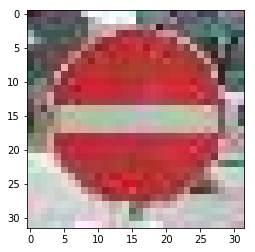

In [44]:
img = mpimg.imread(german_signs_dir + '/6.jpg')
plt.imshow(img)

print(img.shape)

In [45]:
# # manually changed to (32,32)
# image = Image.open(german_signs_dir + '/6.jpg')
# print(type(image))
# (left, upper, right, lower) = (50, 10, 200, 110)
# # image = image.crop((left,upper,right,lower))
# image = image.resize((32,32))
# image = image.convert('RGB')

# image.save(german_signs_dir + '/6.jpg')

In [46]:
img_set = []
for img in os.listdir(german_signs_dir):

    if img == '.ipynb_checkpoints':
        pass
    else:
        img_set.append(np.asarray(mpimg.imread(german_signs_dir + f'/{img}')))

img_set = np.asarray(img_set)
labels_set = [27, 3, 25, 40, 22, 17]


In [47]:
img_set.shape

(6, 32, 32, 3)

In [48]:
gray_img_set = img_set.mean(axis=3, keepdims=True)
normalized_img_set = (gray_img_set - 128.0) / 128

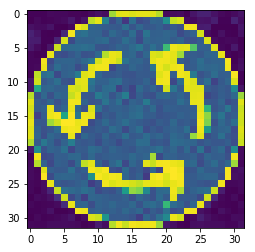

In [49]:
plt.imshow(normalized_img_set[0].squeeze())

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    tf_saver.restore(sess, model_checkpoint)
    accuracy = evaluate(normalized_img_set, labels_set)
    
    print(accuracy)

INFO:tensorflow:Restoring parameters from model.chkpt
0.0


### Predict the Sign Type for Each Image

In [52]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [54]:
model_prediction = None
with tf.Session() as sess:
    tf_saver.restore(sess, model_checkpoint)
    prediction = sess.run(y_pred, feed_dict={x: normalized_img_set, y: np.asarray(labels_set)})
    
    model_prediction = prediction
    print(model_prediction)

INFO:tensorflow:Restoring parameters from model.chkpt


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-f26442b2c294>", line 9, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [50]:
with tf.Session() as sess:
    tf_saver.restore(sess, model_checkpoint)
    
    sess.run(tf.nn.top_k(model_prediction , k=5))

INFO:tensorflow:Restoring parameters from model.chkpt


NameError: name 'model_prediction' is not defined

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
outputFeatureMap('../data/1.jpg', 'relu')